In [2]:
import numpy as np
from shapely.geometry import Point, Polygon
from shapely import affinity as af
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
import time
import imageio
from pathlib import Path

from ActionController import ActionController

In [65]:
entropies_lookahead_depth_0 = np.load("3.17.2021/entropies_depth=0_duration=183.13_sec.npy")
entropies_lookahead_depth_1 = np.load("3.17.2021/entropies_depth=1_duration=515.49_sec.npy")
entropies_lookahead_depth_2 = np.load("3.17.2021/entropies_depth=2_duration=547.30_sec.npy")
entropies_lookahead_depth_3 = np.load("3.17.2021/entropies_depth=3_duration=2949.72_sec.npy")

costs_lookahead_depth_0 = np.load("3.17.2021/costs_depth=0, duration=183.13_sec.npy")
costs_lookahead_depth_1 = np.load("3.17.2021/costs_depth=1, duration=515.49_sec.npy")
costs_lookahead_depth_2 = np.load("3.17.2021/costs_depth=2, duration=547.30_sec.npy")
costs_lookahead_depth_3 = np.load("3.17.2021/costs_depth=3, duration=2949.72_sec.npy")

In [66]:
# Compute reward values
values_0 = np.zeros(entropies_lookahead_depth_0.shape)
for i in range(1,entropies_lookahead_depth_0.size):
    ig = entropies_lookahead_depth_0[i-1] - entropies_lookahead_depth_0[i]
    cost = costs_lookahead_depth_0[i]
    values_0[i] = ig / (cost)
values_0 = np.cumsum(values_0)
    
values_1 = np.zeros(entropies_lookahead_depth_1.shape)
for i in range(1,entropies_lookahead_depth_1.size):
    ig = entropies_lookahead_depth_1[i-1] - entropies_lookahead_depth_1[i]
    cost = costs_lookahead_depth_1[i]
    values_1[i] = ig / (cost)
values_1 = np.cumsum(values_1)

values_2 = np.zeros(entropies_lookahead_depth_2.shape)
for i in range(1,entropies_lookahead_depth_2.size):
    ig = entropies_lookahead_depth_2[i-1] - entropies_lookahead_depth_2[i]
    cost = costs_lookahead_depth_2[i]
    values_2[i] = ig / (cost)
values_2 = np.cumsum(values_2)

values_3 = np.zeros(entropies_lookahead_depth_3.shape)
for i in range(1,entropies_lookahead_depth_3.size):
    ig = entropies_lookahead_depth_3[i-1] - entropies_lookahead_depth_3[i]
    cost = costs_lookahead_depth_3[i]
    values_3[i] = ig / (cost)
values_3 = np.cumsum(values_3)

In [67]:
costs_lookahead_depth_0 = np.cumsum(costs_lookahead_depth_0)
costs_lookahead_depth_1 = np.cumsum(costs_lookahead_depth_1)
costs_lookahead_depth_2 = np.cumsum(costs_lookahead_depth_2)
costs_lookahead_depth_3 = np.cumsum(costs_lookahead_depth_3)

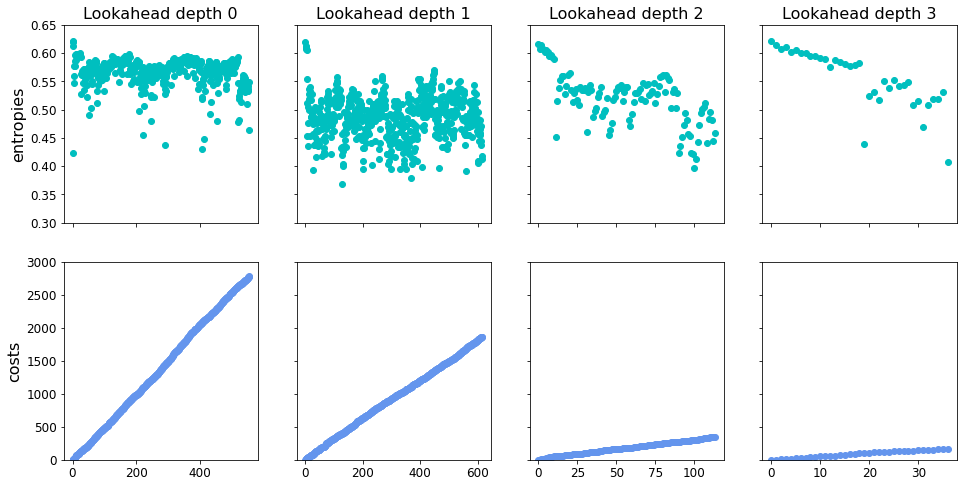

In [73]:
fig, axs = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(16, 8))
# fig.suptitle("Entropies and Costs", fontsize=24)

for col, ax in enumerate(axs[0]):
    ax.set_title(f"Lookahead depth {col}", fontsize=16)
    ax.tick_params(labelsize=12)
    ax.set_ylim([0.3,0.65])
for col, ax in enumerate(axs[1]):
#     ax.set_xlabel(f"iterations", fontsize=16)
    ax.tick_params(labelsize=12)
    ax.set_ylim([0, 3000])

# for col, ax in enumerate(axs[2]):
#     ax.set_xlabel(f"iterations", fontsize=16)
#     ax.tick_params(labelsize=12)
#     ax.set_ylim([-0.8, 0.3])
# #     ax.set_ylim([-0.05, 0.05])
# #     ax.set_ylim([0, 2500])

axs[0, 0].set_ylabel("entropies", rotation="vertical", fontsize=16)
axs[1, 0].set_ylabel("costs", rotation="vertical", fontsize=16)
# axs[2, 0].set_ylabel("value", rotation="vertical", fontsize=16)

axs[0, 0].plot(entropies_lookahead_depth_0, 'co')
axs[0, 1].plot(entropies_lookahead_depth_1, 'co')
axs[0, 2].plot(entropies_lookahead_depth_2, 'co')
axs[0, 3].plot(entropies_lookahead_depth_3, 'co')

axs[1, 0].plot(costs_lookahead_depth_0, color='cornflowerblue', marker='o')
axs[1, 1].plot(costs_lookahead_depth_1, color='cornflowerblue', marker='o')
axs[1, 2].plot(costs_lookahead_depth_2, color='cornflowerblue', marker='o')
axs[1, 3].plot(costs_lookahead_depth_3, color='cornflowerblue', marker='o')

# axs[2,0].plot(values_0, 'co')
# axs[2,0].axhline(color='r')
# axs[2,1].plot(values_1, 'co')
# axs[2,1].axhline(color='r')
# axs[2,2].plot(values_2, 'co')
# axs[2,2].axhline(color='r')
# axs[2,3].plot(values_3, 'co')
# axs[2,3].axhline(color='r')

fig.savefig(f"SDM composite panel of entropy and cost.png")

In [63]:
for v in [values_0, values_1, values_2, values_3]:
    print(v.mean())

4.361910312757752e-05
-0.001091624319750686
0.0011874842796249444
-0.00019976200191569002
